# Simple script to make some base tobologies
- 2 port single
- 4 port diff (1 physical lane)
- 8 port diff pair (2 physical lanes)

2-port single-ended channel saved as: single_ended_2port.s2p
4-port differential channel (1 differential pair) saved as: differential_1pair_4port.s4p
8-port (2 differential channels) saved as: differential_2pairs_8port.s8p

=== Summary ===

2-Port Single-Ended Channel:
  Number of ports: 2
  Frequency points: 201
  Frequency range: 0.10 - 20.00 GHz

4-Port Differential Channel (1 pair):
  Number of ports: 4
  Frequency points: 201
  Frequency range: 0.10 - 20.00 GHz

8-Port (2 Differential Channels):
  Number of ports: 8
  Frequency points: 201
  Frequency range: 0.10 - 20.00 GHz


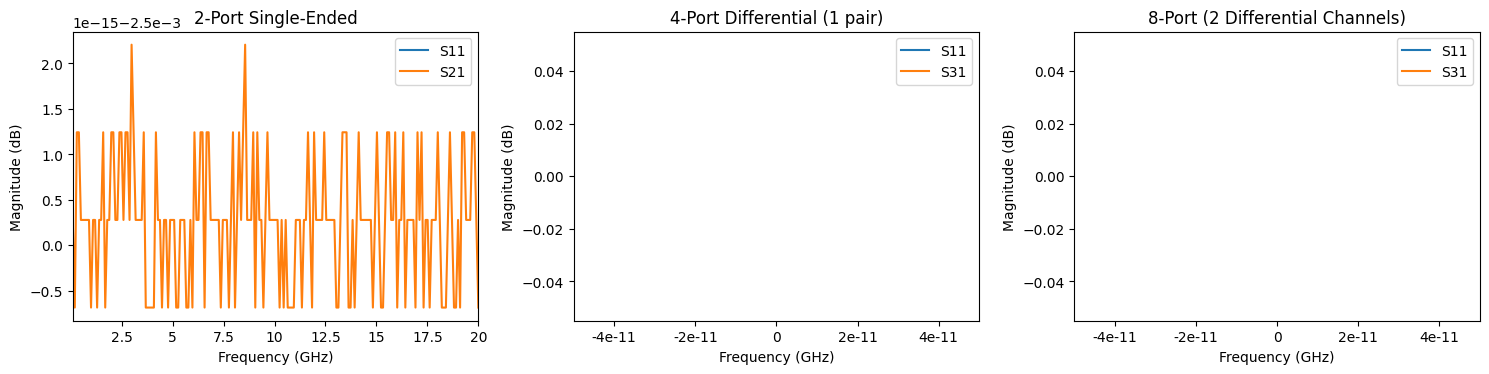

In [1]:
# %%
import skrf as rf
import numpy as np
import matplotlib.pyplot as plt

# Suppress numpy warnings globally
np.seterr(divide='ignore', invalid='ignore')

# %%
# Define frequency range
freq = rf.Frequency(start=0.1, stop=20, npoints=201, unit='GHz')

# %%
# Create transmission line media
z0 = 50  # characteristic impedance
beta = freq.w / rf.c
line_media = rf.media.DefinedGammaZ0(frequency=freq, z0=z0, gamma=0+beta*1j)

# Create a lossy media for more realistic transmission lines
loss_alpha = 0.05  # dB/cm
gamma_lossy = loss_alpha * np.log(10) / 20 + beta*1j
line_media_lossy = rf.media.DefinedGammaZ0(frequency=freq, z0=z0, gamma=gamma_lossy)

# %%
# 1. Build 2-port single-ended channel

# Create transmission line
line_2port = line_media_lossy.line(d=5, unit='cm', name='line_2port')

# Create ports
port1_2p = rf.Circuit.Port(freq, name='port1', z0=50)
port2_2p = rf.Circuit.Port(freq, name='port2', z0=50)

# Define connections
connections_2port = [
    [(port1_2p, 0), (line_2port, 0)],
    [(line_2port, 1), (port2_2p, 0)]
]

# Create the circuit
circuit_2port = rf.Circuit(connections_2port)

# Get the network
network_2port = circuit_2port.network

# %%
# Export 2-port single-ended channel
network_2port.write_touchstone('single_ended_2port.s2p')
print("2-port single-ended channel saved as: single_ended_2port.s2p")

# %%
# 2. Build 4-port differential channel (1 differential pair)
# Port 1 and 2 are the input differential pair (P and N)
# Port 3 and 4 are the output differential pair (P and N)

# Create transmission lines for both traces
line1_4p = line_media_lossy.line(d=5, unit='cm', name='line1_4p')
line2_4p = line_media_lossy.line(d=5, unit='cm', name='line2_4p')

# Create ports
port1_4p = rf.Circuit.Port(freq, name='port1_4p', z0=50)
port2_4p = rf.Circuit.Port(freq, name='port2_4p', z0=50)
port3_4p = rf.Circuit.Port(freq, name='port3_4p', z0=50)
port4_4p = rf.Circuit.Port(freq, name='port4_4p', z0=50)

# Define connections for 4-port differential
connections_4port = [
    [(port1_4p, 0), (line1_4p, 0)],
    [(line1_4p, 1), (port3_4p, 0)],
    [(port2_4p, 0), (line2_4p, 0)],
    [(line2_4p, 1), (port4_4p, 0)]
]

# Create the circuit
circuit_4port = rf.Circuit(connections_4port)

# Get the network
network_4port = circuit_4port.network

# %%
# Export 4-port differential channel
network_4port.write_touchstone('differential_1pair_4port.s4p')
print("4-port differential channel (1 differential pair) saved as: differential_1pair_4port.s4p")

# %%
# 3. Build 8-port for 2 differential channels (2 differential pairs)
# Ports 1-2: First differential pair input (P and N)
# Ports 3-4: First differential pair output (P and N)
# Ports 5-6: Second differential pair input (P and N)
# Ports 7-8: Second differential pair output (P and N)

# Create transmission lines for both differential pairs
line1_8p = line_media_lossy.line(d=5, unit='cm', name='line1_8p')
line2_8p = line_media_lossy.line(d=5, unit='cm', name='line2_8p')
line3_8p = line_media_lossy.line(d=5, unit='cm', name='line3_8p')
line4_8p = line_media_lossy.line(d=5, unit='cm', name='line4_8p')

# Create 8 ports
port1_8p = rf.Circuit.Port(freq, name='port1_8p', z0=50)
port2_8p = rf.Circuit.Port(freq, name='port2_8p', z0=50)
port3_8p = rf.Circuit.Port(freq, name='port3_8p', z0=50)
port4_8p = rf.Circuit.Port(freq, name='port4_8p', z0=50)
port5_8p = rf.Circuit.Port(freq, name='port5_8p', z0=50)
port6_8p = rf.Circuit.Port(freq, name='port6_8p', z0=50)
port7_8p = rf.Circuit.Port(freq, name='port7_8p', z0=50)
port8_8p = rf.Circuit.Port(freq, name='port8_8p', z0=50)

# Define connections for 8-port (2 differential channels)
connections_8port = [
    # First differential pair
    [(port1_8p, 0), (line1_8p, 0)],
    [(line1_8p, 1), (port3_8p, 0)],
    [(port2_8p, 0), (line2_8p, 0)],
    [(line2_8p, 1), (port4_8p, 0)],
    # Second differential pair
    [(port5_8p, 0), (line3_8p, 0)],
    [(line3_8p, 1), (port7_8p, 0)],
    [(port6_8p, 0), (line4_8p, 0)],
    [(line4_8p, 1), (port8_8p, 0)]
]

# Create the circuit
circuit_8port = rf.Circuit(connections_8port)

# Get the network
network_8port = circuit_8port.network

# %%
# Export 8-port (2 differential channels)
network_8port.write_touchstone('differential_2pairs_8port.s8p')
print("8-port (2 differential channels) saved as: differential_2pairs_8port.s8p")

# %%
# Display summary info
print(f"\n=== Summary ===")
print(f"\n2-Port Single-Ended Channel:")
print(f"  Number of ports: {network_2port.nports}")
print(f"  Frequency points: {len(network_2port.f)}")
print(f"  Frequency range: {network_2port.f[0]/1e9:.2f} - {network_2port.f[-1]/1e9:.2f} GHz")

print(f"\n4-Port Differential Channel (1 pair):")
print(f"  Number of ports: {network_4port.nports}")
print(f"  Frequency points: {len(network_4port.f)}")
print(f"  Frequency range: {network_4port.f[0]/1e9:.2f} - {network_4port.f[-1]/1e9:.2f} GHz")

print(f"\n8-Port (2 Differential Channels):")
print(f"  Number of ports: {network_8port.nports}")
print(f"  Frequency points: {len(network_8port.f)}")
print(f"  Frequency range: {network_8port.f[0]/1e9:.2f} - {network_8port.f[-1]/1e9:.2f} GHz")

# %%
# Optional: Plot some S-parameters to verify
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 2-port S11 and S21
network_2port.plot_s_db(ax=axes[0], m=0, n=0, label='S11')
network_2port.plot_s_db(ax=axes[0], m=1, n=0, label='S21')
axes[0].set_title('2-Port Single-Ended')
axes[0].legend()

# 4-port differential S-parameters
network_4port.plot_s_db(ax=axes[1], m=0, n=0, label='S11')
network_4port.plot_s_db(ax=axes[1], m=2, n=0, label='S31')
axes[1].set_title('4-Port Differential (1 pair)')
axes[1].legend()

# 8-port differential S-parameters
network_8port.plot_s_db(ax=axes[2], m=0, n=0, label='S11')
network_8port.plot_s_db(ax=axes[2], m=2, n=0, label='S31')
axes[2].set_title('8-Port (2 Differential Channels)')
axes[2].legend()

plt.tight_layout()
plt.show()

# Touchstone File Puller

In [2]:
# %%
import skrf as rf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import attrs
from typing import Optional, Literal
from enum import Enum


In [3]:
# Suppress numpy warnings
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [4]:
# %%
@attrs.define
class TouchstoneData:
    """Class to handle touchstone file data"""
    
    # Init fields (read-only after init)
    file_folder: Path = attrs.field(converter=Path, on_setattr=attrs.setters.NO_OP)
    file_name: Path = attrs.field(converter=Path, on_setattr=attrs.setters.NO_OP)
    num_ports: int = attrs.field(on_setattr=attrs.setters.NO_OP)

    # Computed fields - read-only (set in __attrs_post_init__)
    full_file_path: Path = attrs.field(init=False, on_setattr=attrs.setters.NO_OP)
    network_single_ended: rf.Network = attrs.field(init=False, repr=False, on_setattr=attrs.setters.NO_OP)
    network_dc_extrapolated: Optional[rf.Network] = attrs.field(init=False, default=None, repr=False, on_setattr=attrs.setters.NO_OP)
    
    # Touchstone file metadata - read-only
    touchstone_format: str = attrs.field(init=False, on_setattr=attrs.setters.NO_OP)
    touchstone_version: str = attrs.field(init=False, on_setattr=attrs.setters.NO_OP)
    num_averages: int = attrs.field(init=False, default=1, on_setattr=attrs.setters.NO_OP)
    if_bandwidth_hz: float = attrs.field(init=False, default=1000.0, on_setattr=attrs.setters.NO_OP)
    
    # User-modifiable fields
    comments: str = attrs.field(
        init=False, 
        factory=str,
        repr=lambda c: f"'{c[:50]}...' ({len(c)} chars)" if len(c) > 50 else f"'{c}'"
    )
    port_name_map: dict = attrs.field(
        init=False,
        factory=dict,
        repr=lambda d: f"{{{', '.join(f'{k}: {v}' for k, v in list(d.items())[:3])}{', ...' if len(d) > 3 else ''}}}" if d else "{}"
    )
    
    # DC Extrapolation parameters (user-settable, None = use defaults)
    dc_extrap_points: Optional[int] = attrs.field(
        default=None, 
        repr=lambda x: x if x is not None else attrs.NOTHING
    )
    dc_extrap_dc_sparam: Optional[np.ndarray] = attrs.field(
        default=None,
        repr=False
    )
    dc_extrap_kind: Optional[str] = attrs.field(
        default=None,
        repr=lambda x: x if x is not None else attrs.NOTHING
    )
    dc_extrap_coords: Optional[str] = attrs.field(
        default=None,
        repr=lambda x: x if x is not None else attrs.NOTHING
    )
    
    # Time domain calculations (computed after DC extrapolation)
    time_resolution_s: float = attrs.field(init=False, on_setattr=attrs.setters.NO_OP)
    max_time_range_s: float = attrs.field(init=False, on_setattr=attrs.setters.NO_OP)
    
    # Frequency fields - read-only
    frequency_unit: str = attrs.field(init=False, on_setattr=attrs.setters.NO_OP)
    start_freq: float = attrs.field(init=False, repr=False, on_setattr=attrs.setters.NO_OP)
    start_freq_scaled: float = attrs.field(init=False, on_setattr=attrs.setters.NO_OP)
    stop_freq: float = attrs.field(init=False, repr=False, on_setattr=attrs.setters.NO_OP)
    stop_freq_scaled: float = attrs.field(init=False, on_setattr=attrs.setters.NO_OP)
    center_freq: float = attrs.field(init=False, repr=False, on_setattr=attrs.setters.NO_OP)
    center_freq_scaled: float = attrs.field(init=False, on_setattr=attrs.setters.NO_OP)
    span_freq: float = attrs.field(init=False, repr=False, on_setattr=attrs.setters.NO_OP)
    span_freq_scaled: float = attrs.field(init=False, on_setattr=attrs.setters.NO_OP)
    npoints: int = attrs.field(init=False, on_setattr=attrs.setters.NO_OP)
    freq_step: float = attrs.field(init=False, repr=False, on_setattr=attrs.setters.NO_OP)
    freq_step_scaled: float = attrs.field(init=False, on_setattr=attrs.setters.NO_OP)
    sweep_type: str = attrs.field(init=False, on_setattr=attrs.setters.NO_OP)
    
    def __attrs_post_init__(self):
        """Read the touchstone file after initialization"""
        self._make_full_file_path_()

        # Read the touchstone file
        self.network_single_ended = rf.Network(str(self.full_file_path))

        self._correct_touchstone_file_check()
        
        # Auto-set frequency units based on max frequency
        self._set_frequency_units_()
        
        # Populate all fields
        self._populate_frequency_fields_()
        self._populate_touchstone_metadata_()
        self._populate_comments_()
        self._initialize_port_name_map_()
        
        # Perform DC extrapolation with defaults
        self.regenerate_dc_extrapolation()

    def _make_full_file_path_(self):
        if not self.file_folder.exists():
            raise FileNotFoundError(f"Folder not found: {self.file_folder}")

        self.full_file_path = self.file_folder / self.file_name
        self.full_file_path = self.full_file_path.with_suffix(f'.s{self.num_ports}p')
        
        if not self.full_file_path.exists():
            raise FileNotFoundError(f"Request Touchstone File not found at: {self.full_file_path}")

    def _correct_touchstone_file_check(self):
        # Verify number of ports matches
        if self.network_single_ended.nports != self.num_ports:
            raise ValueError(
                f"Expected {self.num_ports} ports, but file has {self.network_single_ended.nports} ports"
            )
    
    def _set_frequency_units_(self):
        """Auto-set frequency units based on max frequency in the file"""
        max_freq = self.network_single_ended.f.max()
        
        if max_freq >= 1e9:
            self.network_single_ended.frequency.unit = 'ghz'
        elif max_freq >= 1e6:
            self.network_single_ended.frequency.unit = 'mhz'
        elif max_freq >= 1e3:
            self.network_single_ended.frequency.unit = 'khz'
        else:
            self.network_single_ended.frequency.unit = 'hz'
    
    def _populate_frequency_fields_(self):
        """Populate all frequency-related fields from the network"""
        freq = self.network_single_ended.frequency
        
        self.frequency_unit = freq.unit
        self.start_freq = freq.start
        self.start_freq_scaled = freq.start_scaled
        self.stop_freq = freq.stop
        self.stop_freq_scaled = freq.stop_scaled
        self.center_freq = freq.center
        self.center_freq_scaled = freq.center_scaled
        self.span_freq = freq.span
        self.span_freq_scaled = freq.span_scaled
        self.npoints = freq.npoints
        self.freq_step = freq.step
        self.freq_step_scaled = freq.step_scaled
        self.sweep_type = freq.sweep_type
    
    def _populate_touchstone_metadata_(self):
        """Extract touchstone file format and version information"""
        # Try to determine format from the file
        try:
            with open(self.full_file_path, 'r') as f:
                for line in f:
                    line_upper = line.strip().upper()
                    if line_upper.startswith('#'):
                        # Look for format indicators in option line
                        if 'RI' in line_upper:
                            self.touchstone_format = "RI (Real-Imaginary)"
                        elif 'MA' in line_upper:
                            self.touchstone_format = "MA (Magnitude-Angle)"
                        elif 'DB' in line_upper:
                            self.touchstone_format = "DB (dB-Angle)"
                    # Check for version 2.0 indicator
                    if '[VERSION]' in line_upper:
                        self.touchstone_version = "2.0"
        except:
            self.touchstone_format = "Unknown"
        
        if not hasattr(self, 'touchstone_format'):
            self.touchstone_format = "Unknown (normalized by scikit-rf)"
        
        if not hasattr(self, 'touchstone_version'):
            self.touchstone_version = "1.0"
        
        # Note: Touchstone format doesn't typically contain averages or bandwidth
        # These would come from VNA metadata or measurement settings
        # Default to 1 average and 1kHz bandwidth as requested
        self.num_averages = 1
        self.if_bandwidth_hz = 1000.0
    
    def _populate_comments_(self):
        """Extract comments from the touchstone file"""
        # scikit-rf stores comments in network.comments
        if hasattr(self.network_single_ended, 'comments') and self.network_single_ended.comments:
            self.comments = self.network_single_ended.comments
        else:
            self.comments = ""
    
    def _initialize_port_name_map_(self):
        """Initialize default port name map"""
        # Start with default numeric mapping
        self.port_name_map = {i: f"Port_{i+1}" for i in range(self.num_ports)}
    
    def _calculate_time_domain_parameters_(self, network):
        """
        Calculate time domain parameters from frequency domain data.
        
        Based on:
        - Correlation between VNA and TDR/TDT Extracted S-Parameters up to 20 GHz
          Cherry Wakayama, Jeff Loyer (Intel Corporation/UW)
        - TIME DOMAIN ANALYSIS WITH COPPER MOUNTAIN TECHNOLOGIES VNA
          Signal Integrity Tips and VNA Measurements Dec 2019 Ebook
        """
        c = 299792458  # Speed of light in m/s
        
        # Get frequency parameters from the DC-extrapolated network
        f_max = network.f.max()
        f_min = network.f.min()
        n_points = len(network.f)
        delta_f = (f_max - f_min) / (n_points - 1) if n_points > 1 else f_max - f_min
        
        # Time domain resolution (without velocity factor Vp)
        # Resolution (in time) = C / (2 * (Fmax - Fmin))
        self.time_resolution_s = c / (2 * (f_max - f_min))
        
        # Maximum time range (one way, without velocity factor Vp)
        # Max Time Range = C / (2 * Δf)
        self.max_time_range_s = c / (2 * delta_f) if delta_f > 0 else 0
    
    def regenerate_dc_extrapolation(self, points=None, dc_sparam=None, kind=None, coords=None, **kwargs):
        """
        Regenerate DC extrapolation, using stored parameters as defaults.
        
        Parameters are applied in priority order:
        1. Explicit method arguments (highest priority)
        2. Stored field values (if not None)
        3. scikit-rf defaults (lowest priority)
        
        After extrapolation, updates stored parameters with explicitly provided values.
        """
        
        # Resolve actual values: method arg > stored field > scikit-rf default
        actual_points = points if points is not None else self.dc_extrap_points
        actual_dc_sparam = dc_sparam if dc_sparam is not None else self.dc_extrap_dc_sparam
        actual_kind = kind if kind is not None else (self.dc_extrap_kind or 'cubic')
        actual_coords = coords if coords is not None else (self.dc_extrap_coords or 'cart')
        
        # Perform extrapolation on original network
        self.network_dc_extrapolated = self.network_single_ended.extrapolate_to_dc(
            points=actual_points,
            dc_sparam=actual_dc_sparam,
            kind=actual_kind,
            coords=actual_coords,
            **kwargs
        )
        
        # Update stored parameters with what was explicitly provided
        if points is not None:
            self.dc_extrap_points = points
        if dc_sparam is not None:
            self.dc_extrap_dc_sparam = dc_sparam
        if kind is not None:
            self.dc_extrap_kind = kind
        if coords is not None:
            self.dc_extrap_coords = coords
        
        # Calculate time domain parameters
        self._calculate_time_domain_parameters_(self.network_dc_extrapolated)
    
    @property
    def frequency(self):
        """Return frequency array in Hz from original network"""
        return self.network_single_ended.f
    
    @property
    def frequency_scaled(self):
        """Return frequency array in the set units from original network"""
        return self.network_single_ended.frequency.f_scaled
    
    @property
    def frequency_dc_extrap(self):
        """Return frequency array in Hz from DC-extrapolated network"""
        if self.network_dc_extrapolated is not None:
            return self.network_dc_extrapolated.f
        return None
    
    @property
    def frequency_dc_extrap_scaled(self):
        """Return frequency array in the set units from DC-extrapolated network"""
        if self.network_dc_extrapolated is not None:
            return self.network_dc_extrapolated.frequency.f_scaled
        return None
    
    def get_dc_extrap_info(self):
        """Return DC extrapolation parameters that were set"""
        return {
            k: v for k, v in {
                'points': self.dc_extrap_points,
                'kind': self.dc_extrap_kind,
                'coords': self.dc_extrap_coords,
                'dc_sparam': 'Set' if self.dc_extrap_dc_sparam is not None else None
            }.items() if v is not None
        }

# %%
# Example usage: Load the 2-port single-ended channel
data_2port = TouchstoneData(
    file_folder=Path('.'),
    file_name='single_ended_2port',
    num_ports=2
)

print(data_2port)

# %%
# Show time domain parameters
print(f"\n=== Time Domain Parameters ===")
print(f"Time Resolution: {data_2port.time_resolution_s*1e12:.3f} ps")
print(f"Max Time Range: {data_2port.max_time_range_s*1e9:.3f} ns")
print(f"DC Extrap Info: {data_2port.get_dc_extrap_info()}")

# %%
# Show that we can regenerate with different parameters
print(f"\n=== Regenerating DC Extrapolation ===")
data_2port.regenerate_dc_extrapolation(kind='linear', coords='polar')
print(f"Updated Time Resolution: {data_2port.time_resolution_s*1e12:.3f} ps")
print(f"Updated Max Time Range: {data_2port.max_time_range_s*1e9:.3f} ns")
print(f"Updated DC Extrap Info: {data_2port.get_dc_extrap_info()}")

# %%
# Compare original vs DC-extrapolated frequency ranges
print(f"\n=== Frequency Comparison ===")
print(f"Original: {data_2port.frequency[0]/1e9:.3f} - {data_2port.frequency[-1]/1e9:.3f} GHz ({len(data_2port.frequency)} points)")
print(f"DC Extrap: {data_2port.frequency_dc_extrap[0]/1e9:.3f} - {data_2port.frequency_dc_extrap[-1]/1e9:.3f} GHz ({len(data_2port.frequency_dc_extrap)} points)")

# %%
# Show that comments and port_name_map are still modifiable
print("\n=== Testing Modifiable Fields ===")
data_2port.comments = "Updated comment about this channel"
data_2port.port_name_map = {0: "Input", 1: "Output"}
print(f"Updated comments: {data_2port.comments}")
print(f"Updated port map: {data_2port.port_name_map}")

TouchstoneData(file_folder=PosixPath('.'), file_name=PosixPath('single_ended_2port'), num_ports=2, full_file_path=PosixPath('single_ended_2port.s2p'), touchstone_format='RI (Real-Imaginary)', touchstone_version='1.0', num_averages=1, if_bandwidth_hz=1000.0, comments='', port_name_map={0: Port_1, 1: Port_2}, dc_extrap_points=_Nothing.NOTHING, dc_extrap_kind=_Nothing.NOTHING, dc_extrap_coords=_Nothing.NOTHING, time_resolution_s=0.00749481145, max_time_range_s=1.50645710145, frequency_unit='GHz', start_freq_scaled=0.1, stop_freq_scaled=20.0, center_freq_scaled=10.049999999999999, span_freq_scaled=19.9, npoints=201, freq_step_scaled=0.09949999999999999, sweep_type='lin')

=== Time Domain Parameters ===
Time Resolution: 7494811450.000 ps
Max Time Range: 1506457101.450 ns
DC Extrap Info: {}

=== Regenerating DC Extrapolation ===
Updated Time Resolution: 7494811450.000 ps
Updated Max Time Range: 1506457101.450 ns
Updated DC Extrap Info: {'kind': 'linear', 'coords': 'polar'}

=== Frequency Com

# Dealing with ploting

In [5]:
# %%
class NetworkParameter(Enum):
    """Network parameter types"""
    S = 's'
    Z = 'z'
    Y = 'y'
    H = 'h'
    G = 'g'
    ABCD = 'abcd'
    T = 't'

class Representation(Enum):
    """Data representation types"""
    REAL = 'real'
    IMAG = 'imag'
    MAG = 'magnitude'
    DB = 'db'
    ANGLE_DEG = 'angle_deg'
    ANGLE_DEG_UNWRAP = 'angle_deg_unwrap'
    ANGLE_RAD = 'angle_rad'
    ANGLE_RAD_UNWRAP = 'angle_rad_unwrap'
    TIME = 'time'
    TIME_DB = 'time_db'
    COMPLEX = 'complex'  # For complex plane plots

class PlotType(Enum):
    """Available plot types for network parameters"""
    SMITH = 'smith'
    RECTANGULAR = 'rectangular'
    POLAR = 'polar'
    COMPLEX_RECTANGULAR = 'complex_rectangular'
    COMPLEX_POLAR = 'complex_polar'
    VS_FREQUENCY = 'vs_frequency'  # Generic frequency domain plot
    VS_TIME = 'vs_time'  # Time domain plot

In [6]:
# %%
@attrs.define
class NetworkPlotter:
    """
    Class for plotting network parameters from TouchstoneData.
    
    This class provides methods to plot various representations of network
    parameters using scikit-rf's plotting capabilities.
    """
    
    touchstone_data: 'TouchstoneData' = attrs.field()
    use_dc_extrapolated: bool = attrs.field(default=False)
    
    # Plot range controls - None means use default from scikit-rf
    freq_range: Optional[tuple[float, float]] = attrs.field(
        default=None,
        metadata={'doc': 'Frequency range in Hz (start, stop)'}
    )
    time_range: Optional[tuple[float, float]] = attrs.field(
        default=None,
        metadata={'doc': 'Time range in seconds (start, stop)'}
    )
    y_limits: Optional[tuple[float, float]] = attrs.field(
        default=None,
        metadata={'doc': 'Y-axis limits (min, max)'}
    )
    x_limits: Optional[tuple[float, float]] = attrs.field(
        default=None,
        metadata={'doc': 'Generic x-axis limits (min, max) - overrides freq_range/time_range if set'}
    )
    
    # Scale options
    x_scale: Optional[Literal['linear', 'log']] = attrs.field(
        default=None,
        metadata={'doc': 'X-axis scale - linear or log'}
    )
    y_scale: Optional[Literal['linear', 'log']] = attrs.field(
        default=None,
        metadata={'doc': 'Y-axis scale - linear or log'}
    )
    
    @property
    def network(self) -> rf.Network:
        """Get the appropriate network based on use_dc_extrapolated flag"""
        if self.use_dc_extrapolated and self.touchstone_data.network_dc_extrapolated is not None:
            return self.touchstone_data.network_dc_extrapolated
        return self.touchstone_data.network_single_ended
    
    def _parse_ij_term(self, ij_term: str) -> tuple[int, int]:
        """
        Parse string ij term into 0-indexed port numbers.
        
        Handles both simple format (e.g., 's21') and padded format for >9 ports (e.g., 's1109').
        
        Parameters
        ----------
        ij_term : str
            String like 's21', 's11', or 's1109' (for ports > 9)
            
        Returns
        -------
        m, n : tuple[int, int]
            0-indexed port numbers
        """
        ij_term_lower = ij_term.lower()
        
        # Remove the parameter type character (s, z, y, etc.)
        if ij_term_lower[0] in 'szyhgabtc':
            indices_str = ij_term_lower[1:]
        else:
            indices_str = ij_term_lower
        
        num_ports = self.touchstone_data.num_ports
        
        # Determine if we need padded format (for >9 ports)
        if num_ports > 9:
            # Expect format like '0109' or '1109'
            if len(indices_str) != 4:
                raise ValueError(
                    f"For {num_ports}-port network, ij_term must use 4-digit format like 's0109' or 's1109'"
                )
            m = int(indices_str[:2]) - 1  # Convert to 0-indexed
            n = int(indices_str[2:]) - 1  # Convert to 0-indexed
        else:
            # Simple format like '21' or '11'
            if len(indices_str) != 2:
                raise ValueError(
                    f"ij_term must be 2 digits like 's21' for {num_ports}-port network"
                )
            m = int(indices_str[0]) - 1  # Convert to 0-indexed
            n = int(indices_str[1]) - 1  # Convert to 0-indexed
        
        # Validate indices
        if m < 0 or m >= num_ports or n < 0 or n >= num_ports:
            raise ValueError(
                f"Port indices ({m+1}, {n+1}) out of range for {num_ports}-port network"
            )
        
        return m, n
    
    def _apply_plot_limits(self, ax: plt.Axes, plot_type: PlotType):
        """
        Apply configured axis limits and scales to the plot.
        
        Parameters
        ----------
        ax : plt.Axes
            The axes to modify
        plot_type : PlotType
            The type of plot (to determine if freq_range or time_range applies)
        """
        # Apply x-axis limits
        # Priority: x_limits > freq_range (for freq plots) > time_range (for time plots)
        if self.x_limits is not None:
            ax.set_xlim(self.x_limits)
        elif plot_type in [PlotType.S_TIME, PlotType.S_TIME_DB] and self.time_range is not None:
            ax.set_xlim(self.time_range)
        elif plot_type not in [PlotType.S_TIME, PlotType.S_TIME_DB, PlotType.SMITH, 
                               PlotType.COMPLEX_RECTANGULAR, PlotType.COMPLEX_POLAR] and self.freq_range is not None:
            # For frequency-domain plots (convert Hz to whatever unit the plot uses)
            # scikit-rf handles unit scaling, so we convert to the network's frequency unit
            freq_unit = self.touchstone_data.frequency_unit
            multiplier = self.touchstone_data.network_single_ended.frequency.multiplier
            
            freq_start_scaled = self.freq_range[0] / multiplier
            freq_stop_scaled = self.freq_range[1] / multiplier
            ax.set_xlim(freq_start_scaled, freq_stop_scaled)
        
        # Apply y-axis limits
        if self.y_limits is not None:
            ax.set_ylim(self.y_limits)
        
        # Apply axis scales
        if self.x_scale is not None:
            ax.set_xscale(self.x_scale)
        
        if self.y_scale is not None:
            ax.set_yscale(self.y_scale)
    
    def plot(self, 
             plot_type: PlotType,
             i: Optional[int] = None,
             j: Optional[int] = None,
             ij_term: Optional[str] = None,
             ax: Optional[plt.Axes] = None,
             fig: Optional[plt.Figure] = None,
             **kwargs) -> plt.Axes:
        """
        Plot a network parameter.
        
        Parameters
        ----------
        plot_type : PlotType
            Type of plot to create
        i : int, optional
            First port index (1-indexed). Must provide both i and j, or ij_term.
        j : int, optional
            Second port index (1-indexed). Must provide both i and j, or ij_term.
        ij_term : str, optional
            Parameter string like 's21', 's11'. Alternative to i, j.
        ax : plt.Axes, optional
            Axes to plot on. If None, creates new axes.
        fig : plt.Figure, optional
            Figure to create axes in. If None and ax is None, creates new figure.
        **kwargs
            Additional arguments passed to the plotting function
            
        Returns
        -------
        ax : plt.Axes
            The axes object with the plot
        """
        # Determine port indices
        if ij_term is not None:
            if i is not None or j is not None:
                raise ValueError("Provide either ij_term OR (i, j), not both")
            m, n = self._parse_ij_term(ij_term)
        elif i is not None and j is not None:
            # Convert from 1-indexed to 0-indexed
            m = i - 1
            n = j - 1
            # Validate
            num_ports = self.touchstone_data.num_ports
            if m < 0 or m >= num_ports or n < 0 or n >= num_ports:
                raise ValueError(
                    f"Port indices ({i}, {j}) out of range for {num_ports}-port network"
                )
        else:
            raise ValueError("Must provide either ij_term OR both i and j")
        
        # Handle axes/figure creation
        if ax is None:
            if fig is None:
                fig = plt.figure(figsize=(10, 6))
            ax = fig.add_subplot(111)
        
        # Get the network
        net = self.network
        
        # Route to appropriate plotting method using match/case
        match plot_type:
            case PlotType.SMITH:
                net.plot_s_smith(m=m, n=n, ax=ax, **kwargs)
            case PlotType.S_DB:
                net.plot_s_db(m=m, n=n, ax=ax, **kwargs)
            case PlotType.S_MAG:
                net.plot_s_mag(m=m, n=n, ax=ax, **kwargs)
            case PlotType.S_DEG:
                net.plot_s_deg(m=m, n=n, ax=ax, **kwargs)
            case PlotType.S_DEG_UNWRAP:
                net.plot_s_deg_unwrap(m=m, n=n, ax=ax, **kwargs)
            case PlotType.S_RAD:
                net.plot_s_rad(m=m, n=n, ax=ax, **kwargs)
            case PlotType.S_RAD_UNWRAP:
                net.plot_s_rad_unwrap(m=m, n=n, ax=ax, **kwargs)
            case PlotType.S_REAL:
                net.plot_s_re(m=m, n=n, ax=ax, **kwargs)
            case PlotType.S_IMAG:
                net.plot_s_im(m=m, n=n, ax=ax, **kwargs)
            case PlotType.S_TIME_DB:
                net.plot_s_time_db(m=m, n=n, ax=ax, **kwargs)
            case PlotType.S_TIME:
                net.plot_s_time(m=m, n=n, ax=ax, **kwargs)
            case PlotType.COMPLEX_RECTANGULAR:
                net.plot_s_complex(m=m, n=n, ax=ax, **kwargs)
            case PlotType.COMPLEX_POLAR:
                net.plot_s_polar(m=m, n=n, ax=ax, **kwargs)
            case _:
                raise NotImplementedError(f"Plot type {plot_type} not yet implemented")
        
        # Apply configured limits and scales
        self._apply_plot_limits(ax, plot_type)
        
        return ax

# %%
# Example usage - Basic plotting
plotter = NetworkPlotter(touchstone_data=data_2port, use_dc_extrapolated=False)

ax = plotter.plot(PlotType.S_DB, ij_term='s21')
ax.set_title('S21 - Default Ranges')
plt.tight_layout()
plt.show()

# %%
# Example with frequency range限制
plotter_limited = NetworkPlotter(
    touchstone_data=data_2port,
    use_dc_extrapolated=False,
    freq_range=(1e9, 10e9),  # 1 to 10 GHz
    y_limits=(-50, 0)  # -50 to 0 dB
)

ax = plotter_limited.plot(PlotType.S_DB, ij_term='s21')
ax.set_title('S21 - Limited to 1-10 GHz, -50 to 0 dB')
plt.tight_layout()
plt.show()

# %%
# Example with time range for time domain plots
plotter_time = NetworkPlotter(
    touchstone_data=data_2port,
    use_dc_extrapolated=True,  # Need DC extrapolation for time domain
    time_range=(0, 5e-9),  # 0 to 5 ns
    y_limits=(-80, 0)
)

ax = plotter_time.plot(PlotType.S_TIME_DB, ij_term='s21')
ax.set_title('S21 Time Domain - Limited to 0-5 ns')
plt.tight_layout()
plt.show()

# %%
# Example with log scale
plotter_log = NetworkPlotter(
    touchstone_data=data_2port,
    use_dc_extrapolated=False,
    x_scale='log',
    y_limits=(-50, 0)
)

ax = plotter_log.plot(PlotType.S_DB, ij_term='s21')
ax.set_title('S21 - Log Frequency Scale')
plt.tight_layout()
plt.show()

# %%
# Compare different ranges on subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

plotter_full = NetworkPlotter(touchstone_data=data_2port)
plotter_zoom = NetworkPlotter(
    touchstone_data=data_2port,
    freq_range=(5e9, 15e9),
    y_limits=(-5, 0)
)

plotter_full.plot(PlotType.S_DB, ij_term='s21', ax=ax1)
plotter_zoom.plot(PlotType.S_DB, ij_term='s21', ax=ax2)

ax1.set_title('Full Range')
ax2.set_title('Zoomed: 5-15 GHz')

plt.tight_layout()
plt.show()

AttributeError: type object 'PlotType' has no attribute 'S_DB'

In [ ]:
# %%
# Example usage - Create plotter
plotter = NetworkPlotter(touchstone_data=data_2port, use_dc_extrapolated=False)

# %%
# Plot S21 in dB (default)
ax = plotter.plot(PlotType.VS_FREQUENCY, ij_term='s21')
ax.set_title('S21 - Insertion Loss (dB)')
plt.tight_layout()
plt.show()

# %%
# Plot S11 magnitude (linear)
ax = plotter.plot(PlotType.VS_FREQUENCY, ij_term='s11', representation=Representation.MAG)
ax.set_title('S11 - Return Loss (Linear Magnitude)')
plt.tight_layout()
plt.show()

# %%
# Plot S21 phase unwrapped
ax = plotter.plot(PlotType.VS_FREQUENCY, i=2, j=1, representation=Representation.ANGLE_DEG_UNWRAP)
ax.set_title('S21 - Unwrapped Phase')
plt.tight_layout()
plt.show()

# %%
# Smith chart
ax = plotter.plot(PlotType.SMITH, ij_term='s11')
ax.set_title('S11 - Smith Chart')
plt.tight_layout()
plt.show()

# %%
# Time domain
ax = plotter.plot(PlotType.VS_TIME, ij_term='s21', representation=Representation.TIME_DB)
ax.set_title('S21 - Time Domain (dB)')
plt.tight_layout()
plt.show()

# %%
# Test invalid combinations - these should raise clear errors

# This should fail - Time domain with Z-parameters
try:
    ax = plotter.plot(PlotType.VS_TIME, ij_term='s11', param_type=NetworkParameter.Z)
except ValueError as e:
    print(f"✓ Caught expected error: {e}")

# %%
# This should fail - Smith chart with Y-parameters
try:
    ax = plotter.plot(PlotType.SMITH, ij_term='s11', param_type=NetworkParameter.Y)
except ValueError as e:
    print(f"✓ Caught expected error: {e}")

# %%
# This should fail - Time representation with frequency plot
try:
    ax = plotter.plot(PlotType.VS_FREQUENCY, ij_term='s21', representation=Representation.TIME)
except ValueError as e:
    print(f"✓ Caught expected error: {e}")